## part 1

In [17]:
import random
from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Set your random seed to 1234
random.seed(1234)

In [18]:
# 2. Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images, valid_images, train_labels, valid_labels = \
    train_test_split(train_images, train_labels, test_size = 0.16666, random_state = 1234)

In [20]:
# initial test
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result = network.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), 
                     epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 25us/step - loss: 0.5071 - acc: 0.8398 - val_loss: 0.2395 - val_acc: 0.9289
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1552 - acc: 0.9534 - val_loss: 0.1313 - val_acc: 0.9594
Epoch 3/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0961 - acc: 0.9703 - val_loss: 0.1142 - val_acc: 0.9667
Epoch 4/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0670 - acc: 0.9802 - val_loss: 0.0750 - val_acc: 0.9768
Epoch 5/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0471 - acc: 0.9855 - val_loss: 0.1511 - val_acc: 0.9613
Epoch 6/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0350 - acc: 0.9897 - val_loss: 0.1187 - val_acc: 0.9700
Epoch 7/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0284 - acc: 0.9914 - val_loss: 0.1309 - 

Epoch 118/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0025 - acc: 0.9996 - val_loss: 0.2157 - val_acc: 0.9777
Epoch 119/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0054 - acc: 0.9994 - val_loss: 0.1997 - val_acc: 0.9821
Epoch 120/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0031 - acc: 0.9997 - val_loss: 0.2072 - val_acc: 0.9831
Epoch 121/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0068 - acc: 0.9991 - val_loss: 0.1741 - val_acc: 0.9832
Epoch 122/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0038 - acc: 0.9995 - val_loss: 0.2154 - val_acc: 0.9806
Epoch 123/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0051 - acc: 0.9993 - val_loss: 0.2288 - val_acc: 0.9803
Epoch 124/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0069 - acc: 0.9992 - val_loss: 0.2269 - val_acc: 0.9780
Epoch 125/200
50000/

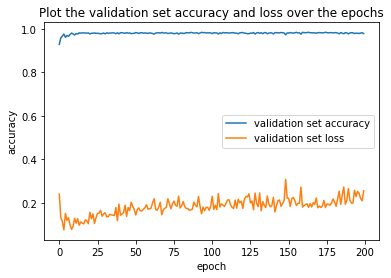

In [21]:
plt.plot(result.history['val_acc'])
plt.plot(result.history['val_loss'])
plt.title('Plot the validation set accuracy and loss over the epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation set accuracy', 'validation set loss'])
plt.show()

In [31]:
result.history['val_loss']

[0.23950581202507018,
 0.13132479227781296,
 0.11416148594617843,
 0.07498709833621979,
 0.15108401753902434,
 0.11870912957191468,
 0.13091213545799255,
 0.09891182293891906,
 0.07739447901248932,
 0.0908739819407463,
 0.12882948813438416,
 0.10615960195064544,
 0.12626232790946962,
 0.09647971866130829,
 0.11162394452095031,
 0.10667017743587494,
 0.102827703499794,
 0.12083892396688461,
 0.11691277711391448,
 0.10366088304519654,
 0.15662298629283905,
 0.1265395634651184,
 0.14863838329315185,
 0.1047289783000946,
 0.1307970390677452,
 0.15076858352422715,
 0.1521164660692215,
 0.16525861427783967,
 0.13781343610286712,
 0.1484562947034836,
 0.15436632605791092,
 0.1351315551519394,
 0.13635843317508697,
 0.1470315890431404,
 0.1439957504272461,
 0.14301154165267943,
 0.1412859717607498,
 0.17809697225093843,
 0.11743401370048523,
 0.19366952741146087,
 0.1427254103541374,
 0.14857173194885254,
 0.1544177884578705,
 0.18830670849084855,
 0.1370499820947647,
 0.17771699142456054,
 0.

Generally speaking, the validation set accuracy and valication set loss are all quite stable, and there's no big fluctuations. the 9th epoch reaches the minimum validation set loss and then the validation set loss starts to increase, so the model's performance degrades from the 9th epoch

In [22]:
# Implement dropout
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(512, activation='relu'))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(512, activation='relu'))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(512, activation='relu'))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(10, activation='softmax'))
network2.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
result2 = network2.fit(train_images, train_labels, 
                       validation_data=(valid_images, valid_labels),
                       epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 29us/step - loss: 0.7174 - acc: 0.7629 - val_loss: 0.2243 - val_acc: 0.9339
Epoch 2/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2686 - acc: 0.9220 - val_loss: 0.1542 - val_acc: 0.9542
Epoch 3/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1969 - acc: 0.9445 - val_loss: 0.1259 - val_acc: 0.9626
Epoch 4/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1621 - acc: 0.9531 - val_loss: 0.1067 - val_acc: 0.9688
Epoch 5/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1407 - acc: 0.9589 - val_loss: 0.0945 - val_acc: 0.9729
Epoch 6/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1280 - acc: 0.9649 - val_loss: 0.1007 - val_acc: 0.9718
Epoch 7/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1196 - acc: 0.9676 - val_loss: 0.0892 - 

Epoch 118/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0663 - acc: 0.9912 - val_loss: 0.1238 - val_acc: 0.9838
Epoch 119/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0618 - acc: 0.9909 - val_loss: 0.1277 - val_acc: 0.9832
Epoch 120/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0694 - acc: 0.9899 - val_loss: 0.1309 - val_acc: 0.9827
Epoch 121/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0617 - acc: 0.9915 - val_loss: 0.1336 - val_acc: 0.9837
Epoch 122/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0630 - acc: 0.9910 - val_loss: 0.1507 - val_acc: 0.9824
Epoch 123/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0618 - acc: 0.9913 - val_loss: 0.1263 - val_acc: 0.9840
Epoch 124/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0538 - acc: 0.9919 - val_loss: 0.1253 - val_acc: 0.9858
Epoch 125/200
50000/

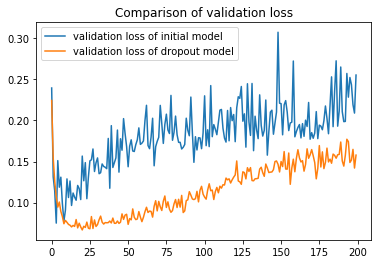

In [23]:
plt.plot(result.history['val_loss'])
plt.plot(result2.history['val_loss'])
plt.legend(['validation loss of initial model', 'validation loss of dropout model'])
plt.title('Comparison of validation loss')
plt.show()

Generally,  after implement layer dropout, the model performs better than the initial model and especially when epochs is getting large.

In [24]:
# regularization
network3 = models.Sequential()
network3.add(Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network3.add(layers.Dense(10, activation='softmax'))
network3.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
result3 = network3.fit(train_images, train_labels, 
                       validation_data=(valid_images, valid_labels),
                       epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 27us/step - loss: 14.0028 - acc: 0.6684 - val_loss: 4.1676 - val_acc: 0.7703
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 3.1054 - acc: 0.7915 - val_loss: 2.4449 - val_acc: 0.8369
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 2.2321 - acc: 0.8357 - val_loss: 2.0226 - val_acc: 0.8530
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.9009 - acc: 0.8583 - val_loss: 1.8719 - val_acc: 0.8244
Epoch 5/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.7054 - acc: 0.8757 - val_loss: 1.6264 - val_acc: 0.8812
Epoch 6/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.5756 - acc: 0.8871 - val_loss: 1.5802 - val_acc: 0.8729
Epoch 7/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.4787 - acc: 0.8970 - val_loss: 1.4904 -

Epoch 118/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8921 - acc: 0.9607 - val_loss: 0.8938 - val_acc: 0.9590
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8948 - acc: 0.9592 - val_loss: 0.9134 - val_acc: 0.9533
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8917 - acc: 0.9609 - val_loss: 0.8974 - val_acc: 0.9574
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8963 - acc: 0.9589 - val_loss: 0.9646 - val_acc: 0.9371
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8908 - acc: 0.9606 - val_loss: 0.9295 - val_acc: 0.9502
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8907 - acc: 0.9605 - val_loss: 0.9046 - val_acc: 0.9555
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8914 - acc: 0.9606 - val_loss: 0.9123 - val_acc: 0.9530
Epoch 125/200
50000/

In [25]:
network4 = models.Sequential()
network4.add(Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
network4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network4.add(layers.Dense(10, activation='softmax'))
network4.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
result4 = network4.fit(train_images, train_labels, 
                       validation_data=(valid_images, valid_labels),
                       epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 29us/step - loss: 1.8274 - acc: 0.8230 - val_loss: 1.0501 - val_acc: 0.9434
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8375 - acc: 0.9363 - val_loss: 0.6732 - val_acc: 0.9376
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5329 - acc: 0.9508 - val_loss: 0.4327 - val_acc: 0.9591
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.3946 - acc: 0.9603 - val_loss: 0.3797 - val_acc: 0.9521
Epoch 5/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.3318 - acc: 0.9637 - val_loss: 0.2818 - val_acc: 0.9732
Epoch 6/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.2804 - acc: 0.9694 - val_loss: 0.2773 - val_acc: 0.9662
Epoch 7/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.2510 - acc: 0.9723 - val_loss: 0.3339 - 

Epoch 118/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0808 - acc: 0.9928 - val_loss: 0.1313 - val_acc: 0.9771
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0836 - acc: 0.9916 - val_loss: 0.1265 - val_acc: 0.9770
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0832 - acc: 0.9914 - val_loss: 0.1287 - val_acc: 0.9779
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0827 - acc: 0.9920 - val_loss: 0.1296 - val_acc: 0.9781
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0809 - acc: 0.9928 - val_loss: 0.1233 - val_acc: 0.9791
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0847 - acc: 0.9915 - val_loss: 0.1451 - val_acc: 0.9707
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0824 - acc: 0.9917 - val_loss: 0.1716 - val_acc: 0.9671
Epoch 125/200
50000/

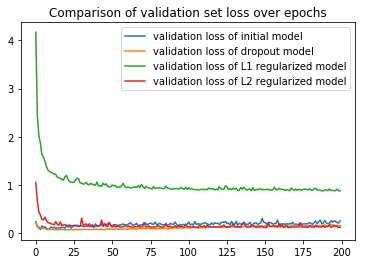

In [26]:
plt.plot(result.history['val_loss'])
plt.plot(result2.history['val_loss'])
plt.plot(result3.history['val_loss'])
plt.plot(result4.history['val_loss'])
plt.legend(['validation loss of initial model', 'validation loss of dropout model', 
            'validation loss of L1 regularized model','validation loss of L2 regularized model'])
plt.title('Comparison of validation set loss over epochs')
plt.show()

According to the plot, dropout model appears to perform the best.

In [27]:
# final model
final = models.Sequential()
final.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
final.add(layers.Dropout(0.5))
final.add(layers.Dense(512, activation='relu'))
final.add(layers.Dropout(0.5))
final.add(layers.Dense(512, activation='relu'))
final.add(layers.Dropout(0.5))
final.add(layers.Dense(512, activation='relu'))
final.add(layers.Dropout(0.5))
final.add(layers.Dense(10, activation='softmax'))
final.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
result5 = final.fit(train_images, train_labels, epochs=30, batch_size=512)

Epoch 1/30
50000/50000 [==============================] - 1s 29us/step - loss: 0.7180 - acc: 0.7632
Epoch 2/30
50000/50000 [==============================] - 1s 17us/step - loss: 0.2659 - acc: 0.9241
Epoch 3/30
50000/50000 [==============================] - 1s 16us/step - loss: 0.1990 - acc: 0.9443
Epoch 4/30
50000/50000 [==============================] - 1s 16us/step - loss: 0.1642 - acc: 0.9539
Epoch 5/30
50000/50000 [==============================] - 1s 16us/step - loss: 0.1422 - acc: 0.9615
Epoch 6/30
50000/50000 [==============================] - 1s 16us/step - loss: 0.1305 - acc: 0.9643
Epoch 7/30
50000/50000 [==============================] - 1s 16us/step - loss: 0.1146 - acc: 0.9673
Epoch 8/30
50000/50000 [==============================] - 1s 16us/step - loss: 0.1080 - acc: 0.9707
Epoch 9/30
50000/50000 [==============================] - 1s 16us/step - loss: 0.1016 - acc: 0.9722
Epoch 10/30
50000/50000 [==============================] - 1s 16us/step - loss: 0.0941 - acc: 0.9737

In [30]:
test_loss, test_acc = final.evaluate(test_images, test_labels)
print('test_loss is ', test_loss)
print('test_acc is ', test_acc)

10000/10000 [==============================] - 1s 57us/step
test_loss is  0.09395000094186598
test_acc is  0.9825


My result shows that the accuracy is larger than the baseline, which is 0.9785